# Basic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

# Keras

In [106]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import layers
from keras.regularizers import L1L2
from keras import backend

# Data

In [38]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [34]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [13]:
X, y = mglearn.datasets.make_forge()

C:\Users\LG\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [45]:
X, y = mglearn.datasets.load_extended_boston()

In [7]:
X, y = mglearn.datasets.make_wave(n_samples = 50)

In [101]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalization

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)

In [10]:
X_scaled.mean(axis = 0)

array([-6.66133815e-18])

# train_test_split

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 0)

# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
clf.score(X_train, y_train)

1.0

In [16]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=1).fit(X_train, y_train)
reg.score(X_train, y_train)

1.0

# Regression

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
lr.coef_
lr.intercept_

30.934563673638145

In [31]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
ridge.score(X_train, y_train)

0.9282273685001985

In [32]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
lasso.score(X_train, y_train)

0.7709955157630054

In [33]:
from sklearn.linear_model import ElasticNet
elas = ElasticNet(alpha=0.1, l1_ratio=0.3).fit(X_train, y_train)
elas.score(X_train, y_train)

0.7100224566409863

In [26]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C = 0.1).fit(X_train, y_train)
LR.score(X_train, y_train)

0.9859154929577465

# Parametric Classification

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(simple_train)
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

# Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb.score(X_train, y_train)

0.9464285714285714

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, y_train)
mnb.score(X_train, y_train)

# Dimension Reduction

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10).fit(X_scaled)
X_scaled_pca = pca.transform(X_scaled)
X_scaled_pca.shape

(569, 10)

In [43]:
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=10).fit(X_scaled)
X_scaled_fa = fa.transform(X_scaled)
X_scaled_fa.shape

(569, 10)

# Gradient Descent

In [44]:
# num_gradient 쓰려면 w = np.array 꼭 적용!
def num_gradient(function, w):
    h = 1.0e-4
    grad = np.zeros_like(w)
    w_temp = w.copy()
    
    for i in range(w.size):
        w_temp[i] = w[i] + h
        f1 = function(w_temp)
        w_temp[i] = w[i] - h
        f2 = function(w_temp)
        grad[i] = (f1 - f2) / (2 * h)
    return grad

In [ ]:
w = np.array([1.0, 1.0])
myu = 0.1

for i in range(1000):
    w_temp = w
    w = w - myu * num_gradient(problem, w)
    error = np.sum((w - w_temp)**2)
    if(error < 1.0e-6):
        print('iter : {}, weight : {}, error : {}'.format(i, w, error))
        break

# Artificial Neural Network

In [99]:
backend.clear_session()
model = Sequential()
input_shape = X_train.shape[1]
model.add(Dense(100, activation = 'relu', input_dim = input_shape))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
result = model.fit(X_train, Y_train, batch_size = 100, epochs = 20, verbose = 0, validation_data = (X_test, Y_test))

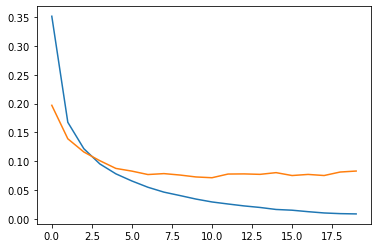

In [100]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

# Convolutional Neural Network

In [104]:
k1_number = 32
k2_number = 64
k3_number = 128
k_size = (3, 3)
p_size = (2, 2)

In [116]:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
# https://keras.io/api/layers/pooling_layers/max_pooling2d/

keras.backend.clear_session()
model = Sequential()
sample_shape = (28, 28, 1)
model.add(Conv2D(k1_number, kernel_size = k_size, padding = 'same', strides = (1, 1), activation = 'relu', input_shape = sample_shape))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size = p_size, strides = (2,2)))
model.add(Conv2D(k2_number, kernel_size = k_size, padding = 'same', strides = (1, 1), activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size = p_size, strides = (2,2)))
model.add(Conv2D(k3_number, kernel_size = k_size, padding = 'same', strides = (1, 1), activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size = p_size, strides = (2,2)))
model.add(layers.Flatten())

In [117]:
model.add(Dense(100, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(Dense(10, activation = 'softmax'))

In [118]:
optimizer = keras.optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [119]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [121]:
result = model.fit(X_train, Y_train, epochs = 10, batch_size = 64, validation_data = (X_test, Y_test))

Epoch 1/10
938/938 [==============================] - 103s 109ms/step - loss: 0.0529 - accuracy: 0.9837 - val_loss: 0.0493 - val_accuracy: 0.9831
Epoch 2/10
938/938 [==============================] - 96s 103ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.0361 - val_accuracy: 0.9876
Epoch 3/10
938/938 [==============================] - 97s 104ms/step - loss: 0.0221 - accuracy: 0.9931 - val_loss: 0.0358 - val_accuracy: 0.9892
Epoch 4/10
938/938 [==============================] - 98s 105ms/step - loss: 0.0167 - accuracy: 0.9947 - val_loss: 0.0317 - val_accuracy: 0.9893
Epoch 5/10
938/938 [==============================] - 98s 105ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.0313 - val_accuracy: 0.9891
Epoch 6/10
938/938 [==============================] - 98s 105ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 0.0288 - val_accuracy: 0.9912
Epoch 7/10
938/938 [==============================] - 98s 104ms/step - loss: 0.0086 - accuracy: 0.9971 - val_loss: 0.0320 - val_a

# mnist preset

In [94]:
# ver ANN
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [102]:
# ver CNN
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [103]:
from keras.utils import np_utils
n_class = 10
Y_train = np_utils.to_categorical(y_train, n_class)
Y_test = np_utils.to_categorical(y_test, n_class)
Y_test.shape

(10000, 10)

# Discrete_scatter

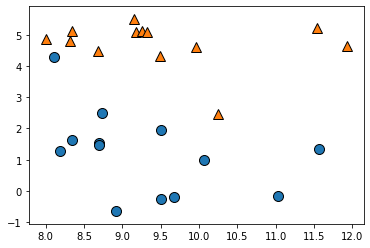

In [17]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)

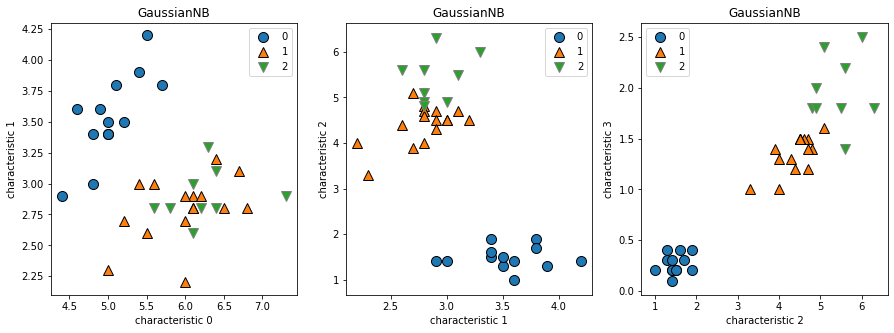

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, i in zip(axes, range(3)):
    mglearn.discrete_scatter(X_test[:,i], X_test[:,i+1], y_test, ax = ax)
    ax.set_title(gnb.__class__.__name__)
    ax.set_xlabel('characteristic {}'.format(i))
    ax.set_ylabel('characteristic {}'.format(i+1))
    ax.legend()

# plot_2d_separator

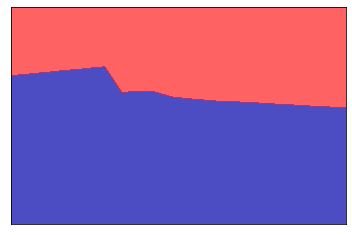

In [18]:
mglearn.plots.plot_2d_separator(clf, X, fill = True, alpha = 0.7)

# plot accuracy

In [47]:
alphas = []
train_accuracy = []
test_accuracy = []

for i in range(100):
    alpha = i * 0.01
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    alphas.append(alpha)
    train_accuracy.append(ridge.score(X_train, y_train))
    test_accuracy.append(ridge.score(X_test, y_test))

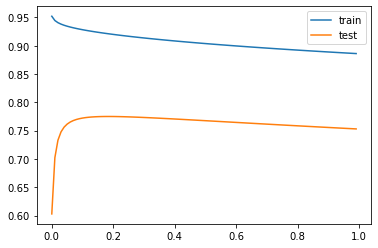

In [48]:
plt.plot(alphas, train_accuracy, label = 'train')
plt.plot(alphas, test_accuracy, label = 'test')
plt.legend()

# Metrics function

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) # tn, fp, fn, tp

In [ ]:
# Multinomial Naive Bayes에서 classfication 확률 예측
mnb.predict_proba(X_test_dtm)